# 1. Business Understanding

Customer churn is a customer's decision to stop purchasing a particular company service. It thus represents the counterpart to long-term customer loyalty. In order to promote customer loyalty, companies must use analyzes that recognize at an early stage whether a customer wants to leave the company. This enables marketing and sales measures to be initiated before the actual loss of customers. In this context, the service specifically answers these two questions: What is the probability that historical data will be used to predict whether a customer will migrate to another provider? Which factors lead to customer churn?

# 2. Data and Data Understanding

The data record of a fictitious telecommunications company is used to visualize and implement the service. This consists of 7,043 lines. Each line describes a customer with 21 columns. Each column defines different characteristics (attributes) of the customers. Based on the data, it should be classified whether a customer leaves the company or not. For this purpose, the historical data contain the target variable “Churn”, which provides information on whether a customer has churned or not.

## 2.1. Import of Relevant Modules

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import imblearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
sns.set()
# remove warnings
warnings.filterwarnings('ignore')

## 2.2. Read Data

In [142]:
data_raw = pd.read_csv("https://storage.googleapis.com/ml-service-repository-datastorage/Customer_Churn_Prediction_data.csv")
data_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data set consists of 7,043 lines and 21 attributes:

- Attribute to be predicted: Churn
- Numeric attributes: Tenure, MonthlyCharges and TotalCharges.
- Categorical attributes: CustomerID, Gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod.

Not all data types were read in correctly:
- TotalCharges must be a numerical value -> convert to float

In [144]:
# test for duplicates
data_raw[data_raw.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No duplicates in data frame

## 2.3. Data Cleaning

The first read errors should be corrected here, before the actual data preparation.

In [145]:
# convert total charges
data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The conversion of the TotalCharges has resulted in zero values. These zero values must be corrected.

In [146]:
# Remove zero values
# axis = 0 rows / axis = 1 columns
data_no_mv = data_raw.dropna(axis=0)

## 2.4. Descriptive Analytics

In this part of the notebook, data understanding is to be taken into account with the help of descriptive analytics. After removing the zero values, the data record consists of 7032 rows, one of which each describes a customer, and 21 columns that define the customer's attributes. With the help of this data, an attempt should be made to classify whether a customer leaves or not. For this purpose, the historical data contain the target variable “Churn”, which provides information on whether a customer has churned.

## 2.4.1. Continous Features

First, the distributions of the continous features are examined individually and in a second step the categorical features are set in connection with the target variable.

In [147]:
# load continous features
numeric_data = data_no_mv.select_dtypes(include=[np.number])

### Tenure

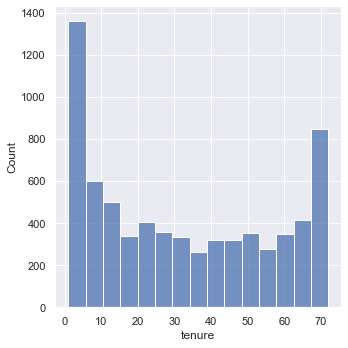

In [148]:
sns.displot(numeric_data["tenure"])

- No normal distribution recognizable.
- No outliers recognizable.
- Customers are potentially evenly distributed over the individual months, but a large number of customers have not long been part of the company.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

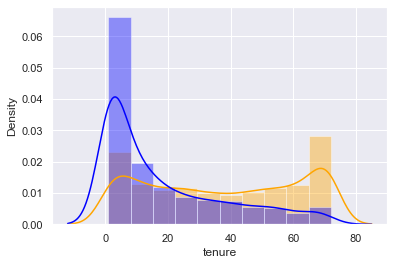

In [149]:
sns.distplot(data_no_mv[data_no_mv.Churn == 'No']["tenure"],
             bins=10,
             color='orange',
             label='Non-Churn',
             kde=True)
sns.distplot(data_no_mv[data_no_mv.Churn == 'Yes']["tenure"],
             bins=10,
             color='blue',
             label='Churn',
             kde=True)

Customers who have not been with the company for long are more likely to migrate than long-term customers.

### Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

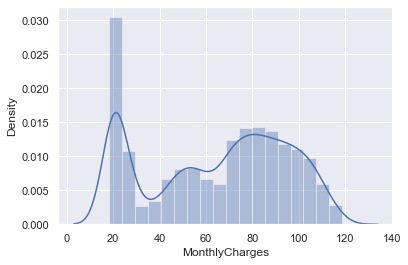

In [150]:
sns.distplot(numeric_data["MonthlyCharges"])

- No normal distribution recognizable.
- Most of the customers are in the front of the distribution and pay relatively low monthly fees.
- Nevertheless, the curve runs evenly with a renewed increase backwards and accordingly no outliers can be identified.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

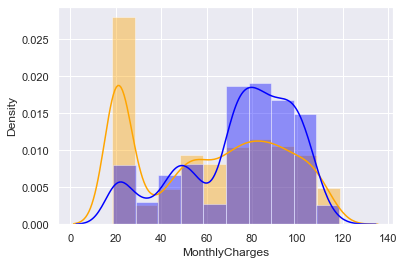

In [151]:
sns.distplot(data_no_mv[data_no_mv.Churn == 'No']["MonthlyCharges"],
             bins=10,
             color='orange',
             label='Non-Churn',
             kde=True)
sns.distplot(data_no_mv[data_no_mv.Churn == 'Yes']["MonthlyCharges"],
             bins=10,
             color='blue',
             label='Churn',
             kde=True)

- Customers with low monthly fees are more likely to churn.
- Churn trend between customers who are churning and customers who are not churning becomes nearly the same as monthly fees increase.

### Total Charges

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

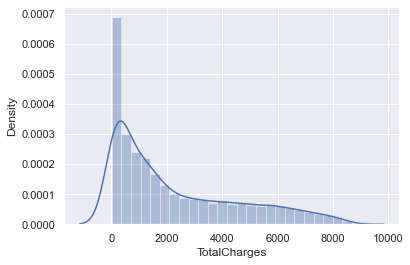

In [152]:
sns.distplot(numeric_data["TotalCharges"])

- The curve flattens extremely strongly towards the rear.
- Similarities to the exponential distribution can be seen. -> Test of the logarithmic transformation to achieve a normal distribution.
- It is questionable whether there are outliers in the rear part. -> box plot

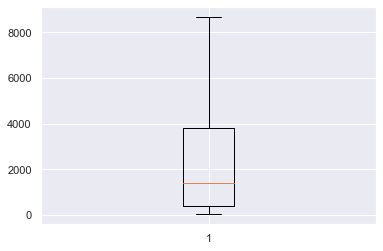

In [153]:
# Boxplot für TotalCharges erstellen, um sicherzustellen, dass keine Ausreißer vorhanden sind.
plt.boxplot(numeric_data["TotalCharges"])
plt.show()

- box plot shows no outliers.
- This means that no outliers can be identified for total charges either.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

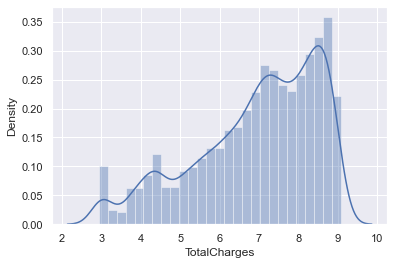

In [154]:
# logarithmic transformation
log_charges = np.log(data_no_mv["TotalCharges"])
sns.distplot(log_charges)

- Even the transformation with the help of the logarithm does not produce a normal distribution.
- Before further transformations, the correlation with other variables should first be examined.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

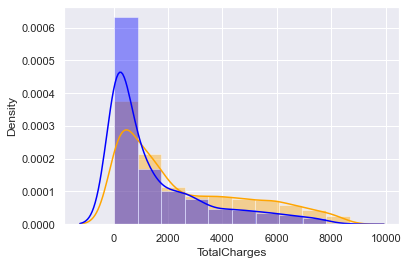

In [155]:
sns.distplot(data_no_mv[data_no_mv.Churn == 'No']["TotalCharges"],
             bins=10,
             color='orange',
             label='Non-Churn',
             kde=True)
sns.distplot(data_no_mv[data_no_mv.Churn == 'Yes']["TotalCharges"],
             bins=10,
             color='blue',
             label='Churn',
             kde=True)

The distribution is almost identical across the entire range of costs for both customers who are churning and customers who are not churning.

### Correlation Analysis

<AxesSubplot:>

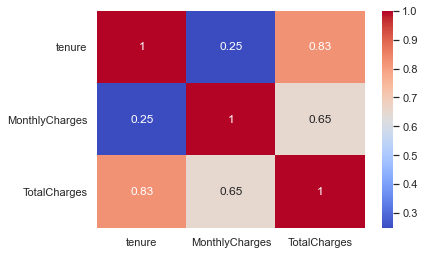

In [156]:
# correlation between continous features
feature_corr = numeric_data.drop("SeniorCitizen", axis=1).corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

The correlation matrix shows that the attributes "tenure" and "TotalCharges" have a critical positive correlation of over 0.8. This relationship will be re-examined later in the context of multicollinearity and must be removed.

### Scatterplots with Continous Features and Target

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

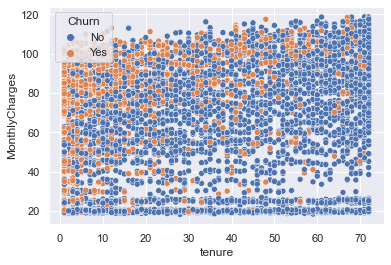

In [157]:
sns.scatterplot(data=data_no_mv, x="tenure", y="MonthlyCharges", hue="Churn")

The scatter plot suggests that customers in the upper left area, i.e. customers with high monthly costs and short periods of employment with the company, are most likely to churn.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

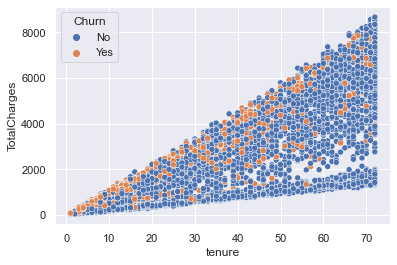

In [158]:
sns.scatterplot(data=data_no_mv, x="tenure", y="TotalCharges", hue="Churn")

There is a purely logical, linear relationship between length of service and the total costs billed. The longer a person has been a customer, the more monthly amounts he has already had to pay.

## 2.4.2. Categorical Features

### Churn (Target)

First, the distribution of the target variable churn is examined.

Text(0.5, 1.0, 'Abwanderung im Vergleich zur Nicht-Abwanderung')

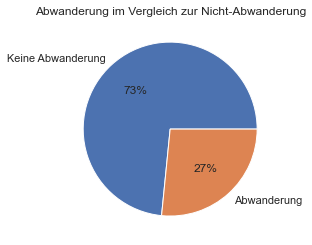

In [159]:
# produce pie chart for churn
# generate procentage relationship
churn_rate = data_no_mv.Churn.value_counts() / len(data_no_mv.Churn)

# Plot
labels = 'Keine Abwanderung', 'Abwanderung'
fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Abwanderung im Vergleich zur Nicht-Abwanderung')

- Churns correspond to around 27% of the total data set, while non-churns correspond to around 73%.
- This is an unbalanced data set and another metric must be used in the evaluation phase.

### Gender

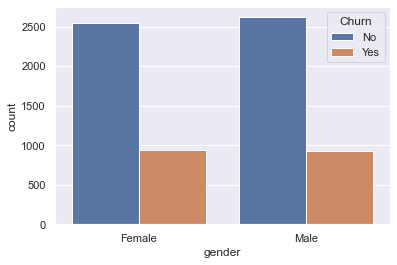

In [160]:
sns.countplot(x="gender", hue="Churn", data=data_no_mv)
plt.show()

The churn rate between male and female is approximately the same.

### Senior Citizen

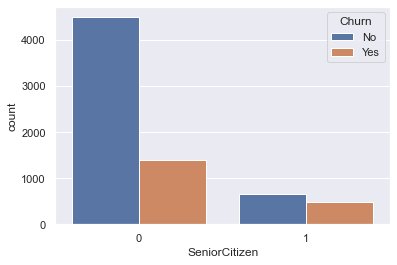

In [161]:
sns.countplot(x="SeniorCitizen", hue="Churn", data=data_no_mv)
plt.show()

Customers classified as seniors are more likely to migrate.

### Partner

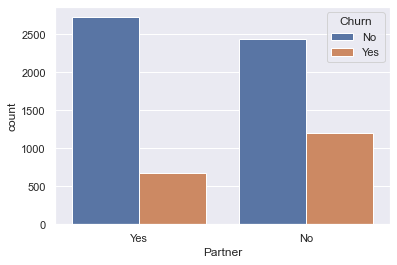

In [162]:
sns.countplot(x="Partner", hue="Churn", data=data_no_mv)
plt.show()

Customers who do not have a partner are more likely to migrate.

### Dependents

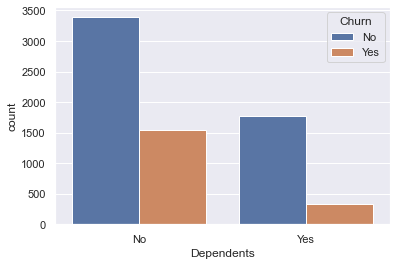

In [163]:
sns.countplot(x="Dependents", hue="Churn", data=data_no_mv)
plt.show()

Customers who have relatives are more likely to migrate.

### Multiple Lines

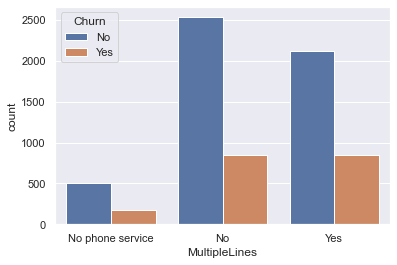

In [164]:
sns.countplot(x="MultipleLines", hue="Churn", data=data_no_mv)
plt.show()

Customers who have multiple connections are less likely to migrate.

### Internet Service

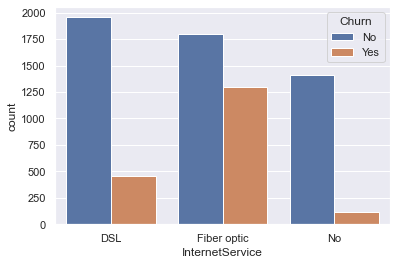

In [165]:
sns.countplot(x="InternetService", hue="Churn", data=data_no_mv)
plt.show()

If a customer has a fiber optic connection, he is more likely to drop out than a customer with DSL.

### Online Security

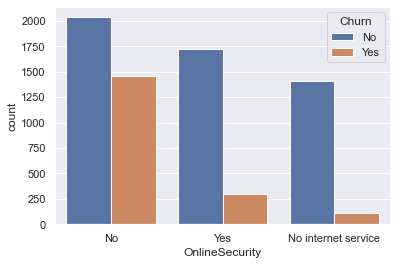

In [166]:
sns.countplot(x="OnlineSecurity", hue="Churn", data=data_no_mv)
plt.show()

Customers who do not use the Internet security service are more likely to migrate.

### Online Backup

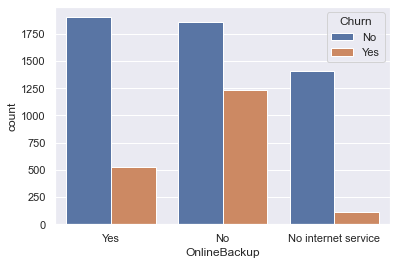

In [167]:
sns.countplot(x="OnlineBackup", hue="Churn", data=data_no_mv)
plt.show()

People who do not use online backup are more likely to migrate.

### Device Protection

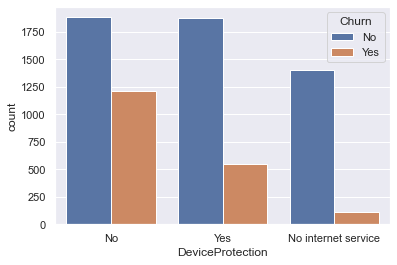

In [168]:
sns.countplot(x="DeviceProtection", hue="Churn", data=data_no_mv)
plt.show()

Customers who have not purchased additional device protection are more likely to migrate.

### Tech Support

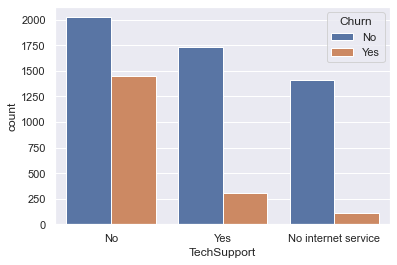

In [169]:
sns.countplot(x="TechSupport", hue="Churn", data=data_no_mv)
plt.show()

Customers who do not use tech support are more likely to migrate.

### Streaming TV/ Streaming Movies

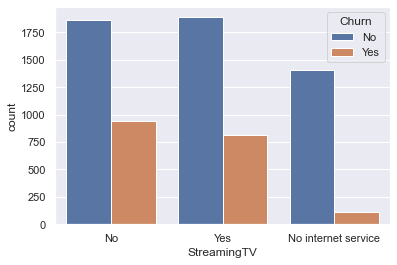

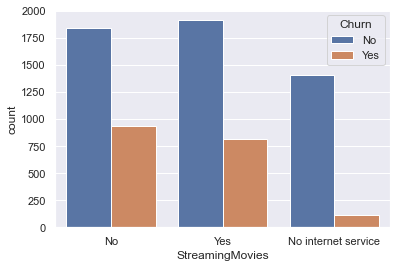

In [170]:
for col in ["StreamingTV", "StreamingMovies"]:
    sns.countplot(x=col, hue='Churn', data=data_no_mv)
    plt.show()

The addition of film and TV streaming offers has hardly any effect on the churn rate.

### Paperless Billing

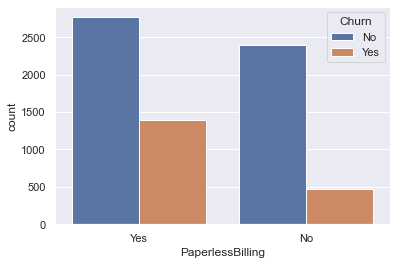

In [171]:
sns.countplot(x="PaperlessBilling", hue="Churn", data=data_no_mv)
plt.show()

Customers who pay without an invoice are more likely to migrate.

### Payment Method

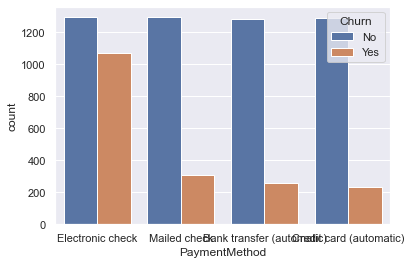

In [172]:
sns.countplot(x="PaymentMethod", hue="Churn", data=data_no_mv)
plt.show()

Customers who pay using electronic checks migrate significantly more often than customers who use a different payment method.

### Contract

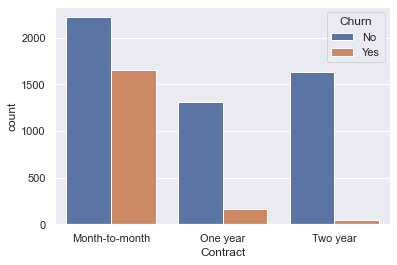

In [173]:
sns.countplot(x="Contract", hue="Churn", data=data_no_mv)
plt.show()

Customers with short-term commitments are more likely to leave than customers with longer-term contracts.

# 3. Data Preparation

## 3.1. Reduce Customer ID

In [174]:
# Removing the Customer ID, it does not add value to the model
data_prep = data_no_mv.drop("customerID", axis = 1)

## 3.2. Recoding of Categorical Variables

In [175]:
# Convert binary variables to 1 and 0 with Yes and No
bin_var = ["Partner","Dependents","PhoneService","PaperlessBilling","Churn"]

In [176]:
def binaer_umwandeln(x):
    return x.map({'Yes':1,'No':0})

In [177]:
data_prep[bin_var]=data_prep[bin_var].apply(binaer_umwandeln)
data_prep.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [178]:
# create dummies
data_enc = pd.get_dummies(data_prep, drop_first=True)
data_enc.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,0,1,0


In [179]:
# Dropping of dummies that also contain No phone service and No Internet service
dup_variables = ["OnlineSecurity_No internet service","OnlineBackup_No internet service", "TechSupport_No internet service","StreamingTV_No internet service","StreamingMovies_No internet service", "DeviceProtection_No internet service","MultipleLines_No phone service"]
data_enc.drop(dup_variables, axis=1, inplace=True)

## 3.3. Test for Multicollinearity

In order to ensure correct operation of the later regression, there must be no multicollinearity between the variables. The presence of the same is checked with the help of the library Statsmodel.

In [180]:
# independent variables
vif_test = data_enc.drop("Churn", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                                  feature         VIF
0                           SeniorCitizen    1.376564
1                                 Partner    2.824725
2                              Dependents    1.969391
3                                  tenure   20.482153
4                            PhoneService   47.244378
5                        PaperlessBilling    2.956951
6                          MonthlyCharges  212.353073
7                            TotalCharges   21.374002
8                             gender_Male    2.021331
9                       MultipleLines_Yes    2.861614
10            InternetService_Fiber optic   17.695260
11                     InternetService_No    8.234451
12                     OnlineSecurity_Yes    2.682712
13                       OnlineBackup_Yes    2.909898
14                   DeviceProtection_Yes    2.992570
15                        TechSupport_Yes    2.758343
16                        StreamingTV_Yes    4.928957
17                    Stream

"MonthlyCharges" has the highest VIF and is removed from the dataset.

In [181]:
data_enc.drop("MonthlyCharges", axis=1, inplace=True)

In [182]:
# the independent variables set 
vif_test = data_enc.drop("Churn", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                                  feature        VIF
0                           SeniorCitizen   1.366018
1                                 Partner   2.817414
2                              Dependents   1.961947
3                                  tenure  17.073930
4                            PhoneService   9.277446
5                        PaperlessBilling   2.796488
6                            TotalCharges  18.028499
7                             gender_Male   1.942509
8                       MultipleLines_Yes   2.514269
9             InternetService_Fiber optic   4.186492
10                     InternetService_No   3.473225
11                     OnlineSecurity_Yes   1.986701
12                       OnlineBackup_Yes   2.182678
13                   DeviceProtection_Yes   2.299462
14                        TechSupport_Yes   2.099655
15                        StreamingTV_Yes   2.749724
16                    StreamingMovies_Yes   2.771330
17                      Contract_One year   2.

"TotalCharges" has the highest VIF and is removed from the dataset.

In [183]:
data_enc.drop("TotalCharges", axis=1, inplace=True)

In [184]:
# the independent variables set 
vif_test = data_enc.drop("Churn", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                                  feature       VIF
0                           SeniorCitizen  1.363244
1                                 Partner  2.816895
2                              Dependents  1.956413
3                                  tenure  7.530356
4                            PhoneService  9.260839
5                        PaperlessBilling  2.757816
6                             gender_Male  1.931277
7                       MultipleLines_Yes  2.426699
8             InternetService_Fiber optic  3.581328
9                      InternetService_No  3.321342
10                     OnlineSecurity_Yes  1.947904
11                       OnlineBackup_Yes  2.093763
12                   DeviceProtection_Yes  2.241375
13                        TechSupport_Yes  2.060410
14                        StreamingTV_Yes  2.636855
15                    StreamingMovies_Yes  2.661529
16                      Contract_One year  2.055971
17                      Contract_Two year  3.456061
18  PaymentM

None of the variables now has a VIF greater than 10.

## 3.4. Feature Scaling

In [185]:
# Separate target variable and predictors
y = data_enc["Churn"]
X = data_enc.drop(labels = ["Churn"], axis = 1)

In [186]:
# Scaling the variables
num_features = ['tenure']

scaler = StandardScaler()

X[num_features] = scaler.fit_transform(X[num_features])
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,gender_Male,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.280248,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0.064303,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,-1.239504,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0.512486,0,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
4,0,0,0,-1.239504,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## 3.5. Undersampling 

In [187]:
iht = InstanceHardnessThreshold(random_state=0,estimator=LogisticRegression (solver='lbfgs', multi_class='auto'))
                               
X_resampled, y_resampled = iht.fit_resample(X, y)

## 3.6. Create Test and Training Data

In [188]:
# Split dataset in train and test datasets
# The default value of 80% to 20% is used.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=110)

# 4. Modelling and Evaluation

## 4.1. Logistic Regression

Logistic regression is used to solve the problem. The two libraries Statsmodels and Scikit-Learn are used for this. The complete evaluation of the model takes place only in the subchapter to Scikit-Learn.

## Statsmodels

### Training and Prediction

In [189]:
# add constant
X_const = sm.add_constant(X_train)
# create model
log_reg = sm.Logit(y_train, X_const).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.082006
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2803
Model:                          Logit   Df Residuals:                     2781
Method:                           MLE   Df Model:                           21
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.8817
Time:                        15:00:28   Log-Likelihood:                -229.86
converged:                       True   LL-Null:                       -1942.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     5.1912     

The trained model shows statistically non-significant variables. This is given if the value P>|z| is greater than 0.05 and it is not the constant.

In [190]:
# Removing the statistically non-significant features (P>|z|> 0.05)
insignificant_features = ["Partner", "gender_Male", "OnlineBackup_Yes", "DeviceProtection_Yes", "PaymentMethod_Credit card (automatic)","PaymentMethod_Mailed check"]
X_train.drop(insignificant_features, axis=1, inplace=True)
X_test.drop(insignificant_features, axis=1, inplace=True)

Nun kann ein zweites Modell erstellt werden:

In [191]:
# new model
X_const = sm.add_constant(X_train)
log_reg2 = sm.Logit(y_train, X_const).fit() 
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.083077
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2803
Model:                          Logit   Df Residuals:                     2787
Method:                           MLE   Df Model:                           15
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.8801
Time:                        15:00:28   Log-Likelihood:                -232.87
converged:                       True   LL-Null:                       -1942.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.7119      0.718      6.566    

No more statistically insignificant variables. The final model was modeled:

In [192]:
# final model
X_const = sm.add_constant(X_train)
log_reg_final = sm.Logit(y_train, X_const).fit() 
print(log_reg_final.summary())

Optimization terminated successfully.
         Current function value: 0.083077
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2803
Model:                          Logit   Df Residuals:                     2787
Method:                           MLE   Df Model:                           15
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.8801
Time:                        15:00:28   Log-Likelihood:                -232.87
converged:                       True   LL-Null:                       -1942.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.7119      0.718      6.566    

In [193]:
# prediction
y_hat = log_reg_final.predict(sm.add_constant(X_test)) 
# Statsmodel only gives the probabilities, therefore rounding is required.   
prediction = list(map(round, y_hat))

## 4.1. Evaluation

Zur Evaluation sollen mehrere Metriken verwendet werden, die komfortabler mittels Scikit-Learn erzeugt werden können. Deshalb wird das identische Modell wie mit Statsmodels nochmals in Scikit-Learn erzeugt.

## Scikit-Learn

### Training and Prediction

In [194]:
# C is needed to build the exact same model as with Statsmodels; source: https://www.kdnuggets.com/2016/06/regularization-logistic-regression.html
logistic_model = LogisticRegression(random_state=0, C=1e8)

In [195]:
# prediction with testdata
result = logistic_model.fit(X_train,y_train)
prediction_test = logistic_model.predict(X_test)
prediction_train = logistic_model.predict(X_train)

### Evaluation

In [196]:
# Accuracy Score 
acc = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy with testdata: {}'.format(acc))

Accuracy with testdata: 0.9882352941176471


The Accuracy suggests an above average model. However, it is an unbalanced data set. Therefore, further metrics have to be analyzed.

In [197]:
# classification report

print("traindata:")
print(classification_report(y_train,prediction_train))
print("testdata:")
print(classification_report(y_test,prediction_test))

traindata:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1374
           1       1.00      0.96      0.98      1429

    accuracy                           0.98      2803
   macro avg       0.98      0.98      0.98      2803
weighted avg       0.98      0.98      0.98      2803

testdata:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       495
           1       1.00      0.98      0.99       440

    accuracy                           0.99       935
   macro avg       0.99      0.99      0.99       935
weighted avg       0.99      0.99      0.99       935



Higher accuracy for training than for the test data set. Overall, the values for the test and training data sets are very similar. Therefore, overfitting or underfitting should not be assumed.

Text(0.5, 39.5, 'Predicted label')

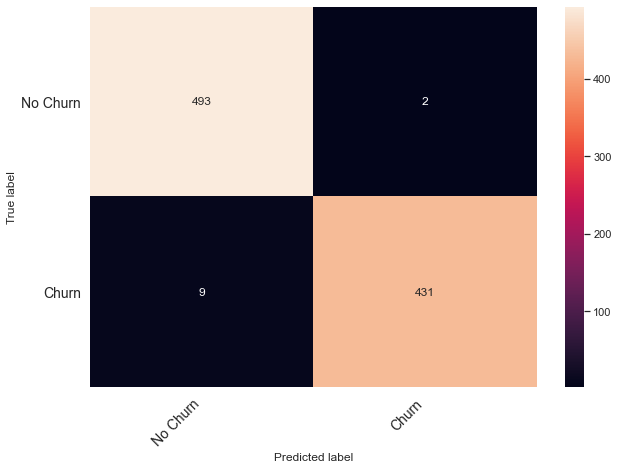

In [198]:
# Confusion matrix testdata
cm = confusion_matrix(y_test,prediction_test)
df_cm = pd.DataFrame(cm, index=['No Churn','Churn'], columns=['No Churn', 'Churn'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [199]:
# metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

True Negatives: 493
False Positives: 2
False Negatives: 9
True Positives: 431
Recall: 0.9795454545454545
Precision: 0.9953810623556582


Precision and recall provide a much more realistic picture of the model. It achieves a precision of around 68% and a recall of 52%. The recall is clearly more important for the use case and must therefore be improved at the expense of the precision.

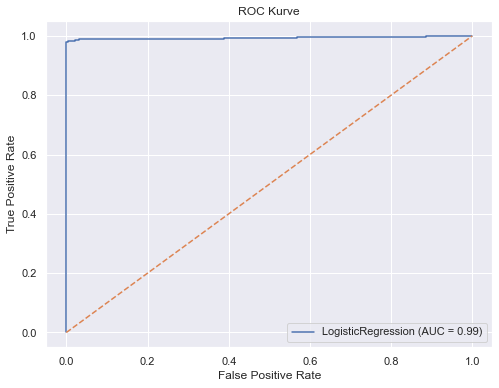

In [200]:
# ROC-Kurve, AUC
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('ROC Kurve')
plot = metrics.plot_roc_curve(logistic_model, X_test, y_test, ax=ax);
ax.plot([0,1], [0,1], '--');

The AUC of the ROC curve yields a good value of 0.84. It can be concluded that there is potential for optimization by optimizing the threshold.

## 4.3. Interpretation

First, however, the results for the business should be illustrated and it should be clarified which customers lead to churn and which speak against churn.

In [201]:
# Read out regression coefficients and thus find out importance of individual attributes
weights = pd.Series(logistic_model.coef_[0],
 index=X_train.columns.values)
weights.sort_values(ascending = False)

InternetService_Fiber optic       3.115901
StreamingMovies_Yes               1.439381
PaymentMethod_Electronic check    1.310265
StreamingTV_Yes                   1.219198
PaperlessBilling                  1.216093
MultipleLines_Yes                 1.098867
SeniorCitizen                     0.395488
Dependents                       -0.732812
TechSupport_Yes                  -0.835712
PhoneService                     -1.207319
OnlineSecurity_Yes               -1.744166
InternetService_No               -2.846463
tenure                           -2.924275
Contract_One year                -3.457173
Contract_Two year                -6.329852
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


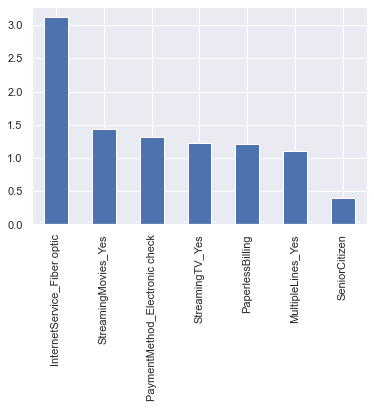

In [202]:
# Graphical representation of key features that lead to churn.
weights = pd.Series(logistic_model.coef_[0],
                 index=X_train.columns.values)
print (weights.sort_values(ascending = False)[:7].plot(kind='bar'))

The three main features that cause churn are:
- The fiber optic service (InternetService_Fiber optic),
- the online payments (PaperlessBilling) and                
- the subscription of the additional movie streaming service (StreamingMovies_Yes).

AxesSubplot(0.125,0.125;0.775x0.755)


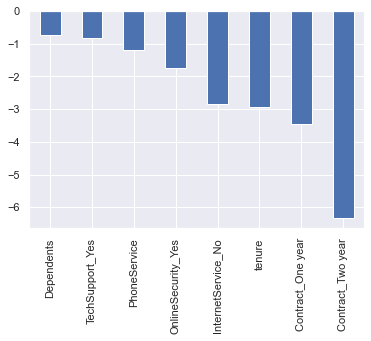

In [203]:
# Most important features that keep customers from churning
print(weights.sort_values(ascending = False)[-8:].plot(kind='bar'))

The three most important features that keep customers from churning are:
- The contracts that can be terminated for two years (Contract_Two year),
- the time people have been customers of a company (Tenure) and                
- No subscription to the Internet service (InternetService_No).

## 4.4. Model Optimization

The recall rate is too low as a target metric and must therefore be increased. Therefore, the metrics are analyzed at different thresholds of the logistic regression.

In [204]:
# Testing the metrics at different thresholds
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
pred_proba_df = y_hat
for i in threshold_list:
    print ('\n******** For a Threshold about {} ******'.format(i))
    # Round up if value is above threshold
    y_test_pred = pred_proba_df.apply(lambda x: 1 if x>i else 0)
    # read metrics
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy: {}".format(test_accuracy))
    # Confusion matrix
    c = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = c.ravel()
    recall = tp/(fn+tp)
    precision = tp/(tp+fp)
    # print metrics
    print("True Negatives: " + str(tn))
    print("False Positives: " + str(fp))
    print("False Negatives: " + str(fn))
    print("True Positives: " + str(tp))
    print("Recall: " + str(recall))
    print("Precision: " + str(precision))


******** For a Threshold about 0.05 ******
Accuracy: 0.8588235294117647
True Negatives: 367
False Positives: 128
False Negatives: 4
True Positives: 436
Recall: 0.990909090909091
Precision: 0.7730496453900709

******** For a Threshold about 0.1 ******
Accuracy: 0.9144385026737968
True Negatives: 420
False Positives: 75
False Negatives: 5
True Positives: 435
Recall: 0.9886363636363636
Precision: 0.8529411764705882

******** For a Threshold about 0.15 ******
Accuracy: 0.9422459893048128
True Negatives: 446
False Positives: 49
False Negatives: 5
True Positives: 435
Recall: 0.9886363636363636
Precision: 0.8987603305785123

******** For a Threshold about 0.2 ******
Accuracy: 0.9657754010695188
True Negatives: 468
False Positives: 27
False Negatives: 5
True Positives: 435
Recall: 0.9886363636363636
Precision: 0.9415584415584416

******** For a Threshold about 0.25 ******
Accuracy: 0.9786096256684492
True Negatives: 481
False Positives: 14
False Negatives: 6
True Positives: 434
Recall: 0.9863

A threshold of 0.3 offers a better result for the application. It increases the recall to a satisfactory level of 73.21% at the expense of the precision. However, the precision is negligible.

This results in the following values:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       495
           1       0.98      0.98      0.98       440

    accuracy                           0.98       935
   macro avg       0.98      0.98      0.98       935
weighted avg       0.98      0.98      0.98       935

Confusion matrix for the new threshold:


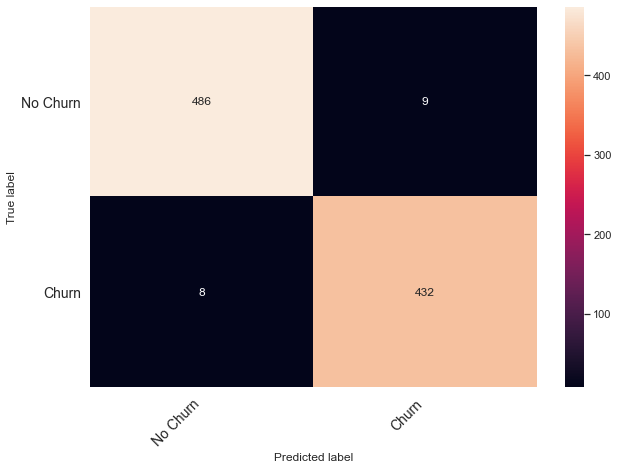

 
Metrics for the new threshold:
Accuracy: 0.9818181818181818
True Negatives: 486
False Positives: 9
False Negatives: 8
True Positives: 432
Recall: 0.9818181818181818
Precision: 0.9795918367346939


In [205]:
# Threshold about 0,3
y_test_pred = pred_proba_df.apply(lambda x: 1 if x>0.30 else 0)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
c = confusion_matrix(y_test, y_test_pred)
# read values from confusion matrix
tn, fp, fn, tp = c.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print(classification_report(y_test,y_test_pred))
# create confusion matrix
print("Confusion matrix for the new threshold:")
df_cm = pd.DataFrame(c, index=['No Churn','Churn'], columns=['No Churn', 'Churn'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(" ")
# print metrics
print("Metrics for the new threshold:")
print("Accuracy: {}".format(test_accuracy))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

As expected, the rate of customers incorrectly classified as churn increases. In turn, however, the number of customers who are correctly predicted as churners (true positives) also increases. As elaborated in the term paper, this is essential, because in case of doubt, a customer would be falsely called by the service team and even perceive this call as good service and be bound to the company in the longer term.

# 5. Deployment

In [206]:
# Separate individual (scaled) customer
customer_df = X_test.iloc[896]

In [207]:
# Overview about the customer
customer_df

SeniorCitizen                     0.000000
Dependents                        0.000000
tenure                           -0.302393
PhoneService                      1.000000
PaperlessBilling                  0.000000
MultipleLines_Yes                 0.000000
InternetService_Fiber optic       0.000000
InternetService_No                1.000000
OnlineSecurity_Yes                0.000000
TechSupport_Yes                   0.000000
StreamingTV_Yes                   0.000000
StreamingMovies_Yes               0.000000
Contract_One year                 0.000000
Contract_Two year                 1.000000
PaymentMethod_Electronic check    0.000000
Name: 1544, dtype: float64

In [208]:
# execute prediction
cust_pred = logistic_model.predict([customer_df])

In [209]:
# evaluate results
def check_prediction(pred):
    if pred[0] == 1:
        print("The customer will probably churn! Inform Customer Relationship Management!")
    else:
        print("The customer probably will not churn.")

In [210]:
check_prediction(cust_pred)

The customer probably will not churn.


# Summary

The notebook showed how a logistic regression can be used to predict the churn of customers in the telecommunications segment.